In [ ]:
import pandas as pd
import os
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [2]:
current_directory = os.getcwd()
print("Current Directory:", current_directory)
df_dims = pd.read_excel('dataframe_withdims.xlsx')
df_AAL = pd.read_excel('ALLabsoluteloading_postMOSAEC.xlsx')

Current Directory: C:\Users\Kshitij Tiwari


In [3]:
keywords = df_dims['MOF'].tolist();
df_AAL['Matched'] = df_AAL['MOF'].str.contains('|'.join(keywords), case=False)

In [4]:
matched_rows = df_AAL[df_AAL['Matched'] == True]
#matched_rows.to_excel('matched_file.xlsx', index=False)
combined_df = pd.merge(df_dims, matched_rows, on='MOF', how='inner')
combined_df.to_excel('combined_matched_rows.xlsx', index=False)

In [5]:
#print('matched_file.xlsx')
#features = df_newcolumns.tolist()
df_new = pd.read_excel('combined_matched_rows.xlsx')
df_new.head()

,MOF,PLD,LCD,Density (g/cc),VSA (m2/cc),GSA (m2/g),VF,PV (cc/g),K0_CH4,K0_CO2,...,CH4 loading (mol/kg),CO2 error (mol/kg),CH4 error (mol/kg),Selectivity (CO2),Selectivity error,TSN,logS error,TSN error,logS,Matched
0,RAHRUP_stripped.cif,3.86749,4.67492,1.50461,372.975,247.887,0.45690,0.303666,0.000010,2.046880,...,0.014163,0.030273,0.008577,228.666415,138.498648,7.640361,0.263043,0.854864,2.359202,True
1,JUWSUR_stripped.cif,4.94079,5.62912,1.79242,972.291,542.446,0.49170,0.274322,0.000008,0.000402,...,0.236155,0.022050,0.052643,15.437307,3.442527,4.333045,0.096848,0.354039,1.188572,True
2,ABEXIQ_stripped.cif,4.07988,4.80036,1.78760,605.013,338.450,0.48434,0.270944,0.000005,0.045327,...,0.021570,0.029571,0.002536,199.506435,23.494075,9.897497,0.051143,0.230354,2.299957,True
3,TANBIV_stripped.cif,4.00937,5.61624,1.45419,552.742,380.103,0.51474,0.353971,0.000011,438.327000,...,0.201083,0.050844,0.011112,22.864171,1.288542,6.248846,0.024475,0.132053,1.359155,True
4,ABEXOW_stripped.cif,4.04136,4.77169,1.81243,582.737,321.522,0.47998,0.264826,0.000005,0.018944,...,0.021082,0.028442,0.001810,201.859797,17.384624,9.809360,0.037402,0.172143,2.305050,True


In [6]:
df_new.describe()

,PLD,LCD,Density (g/cc),VSA (m2/cc),GSA (m2/g),VF,PV (cc/g),K0_CH4,K0_CO2,K0_H2S,...,CO2 loading (mol/kg),CH4 loading (mol/kg),CO2 error (mol/kg),CH4 error (mol/kg),Selectivity (CO2),Selectivity error,TSN,logS error,TSN error,logS
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3.086000e+03,3.086000e+03,3086.000000,...,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000
mean,5.499740,7.382687,1.210874,1177.277844,1225.663350,0.573732,0.566095,2.184676e-05,1.626914e-01,0.023458,...,5.870671,0.790645,0.099360,0.031538,55.096172,39.973923,6.070971,0.035490,0.213790,1.000579
std,2.050852,3.403503,0.421868,596.326369,1041.545583,0.104529,0.390663,2.543992e-05,7.899246e+00,0.697288,...,3.085573,0.688525,0.062906,0.019530,491.481354,624.247694,4.718856,0.050849,0.292122,0.483871
min,3.800700,4.071330,0.126526,47.341600,30.414100,0.284160,0.093511,2.680000e-07,7.520000e-07,0.000001,...,0.362104,0.000361,0.001808,0.000243,1.335137,0.020657,0.052239,0.002869,0.006544,0.125526
25%,4.196837,5.328410,0.961987,696.437750,492.371500,0.495860,0.355884,8.332500e-06,5.235600e-05,0.000141,...,3.462921,0.302629,0.056332,0.017624,4.911865,0.186366,2.870111,0.014858,0.095743,0.691246
50%,4.784705,6.194980,1.175620,1097.080000,888.464500,0.559300,0.467573,1.490000e-05,1.355350e-04,0.000393,...,5.552362,0.576874,0.086359,0.028176,7.316035,0.419612,5.117278,0.024702,0.151583,0.864276
75%,6.006692,7.894550,1.396653,1616.455000,1625.535000,0.637555,0.641463,2.660000e-05,6.040622e-04,0.001320,...,8.080601,1.057207,0.126597,0.041587,16.028083,1.252800,7.843721,0.040164,0.246301,1.204882
max,24.246060,42.798170,5.838890,3585.210000,7241.890000,0.943140,7.454140,4.876590e-04,4.383270e+02,30.041800,...,25.674543,3.607074,0.559890,0.206305,13206.533549,19946.865838,72.283471,1.548542,6.372467,4.120789


In [7]:
df_new["LCD"]

0       4.67492
1       5.62912
2       4.80036
3       5.61624
4       4.77169
         ...   
3081    9.25707
3082    7.08291
3083    6.23028
3084    6.99410
3085    6.40435
Name: LCD, Length: 3086, dtype: float64

In [8]:
#cleaning the data
df_new.dropna(inplace=True) #DATA IMPUTATION, i.e. dealing with missing values

In [9]:
df_new["VF "]

0       0.45690
1       0.49170
2       0.48434
3       0.51474
4       0.47998
         ...   
3081    0.33356
3082    0.47364
3083    0.36302
3084    0.37592
3085    0.38830
Name: VF , Length: 3063, dtype: float64

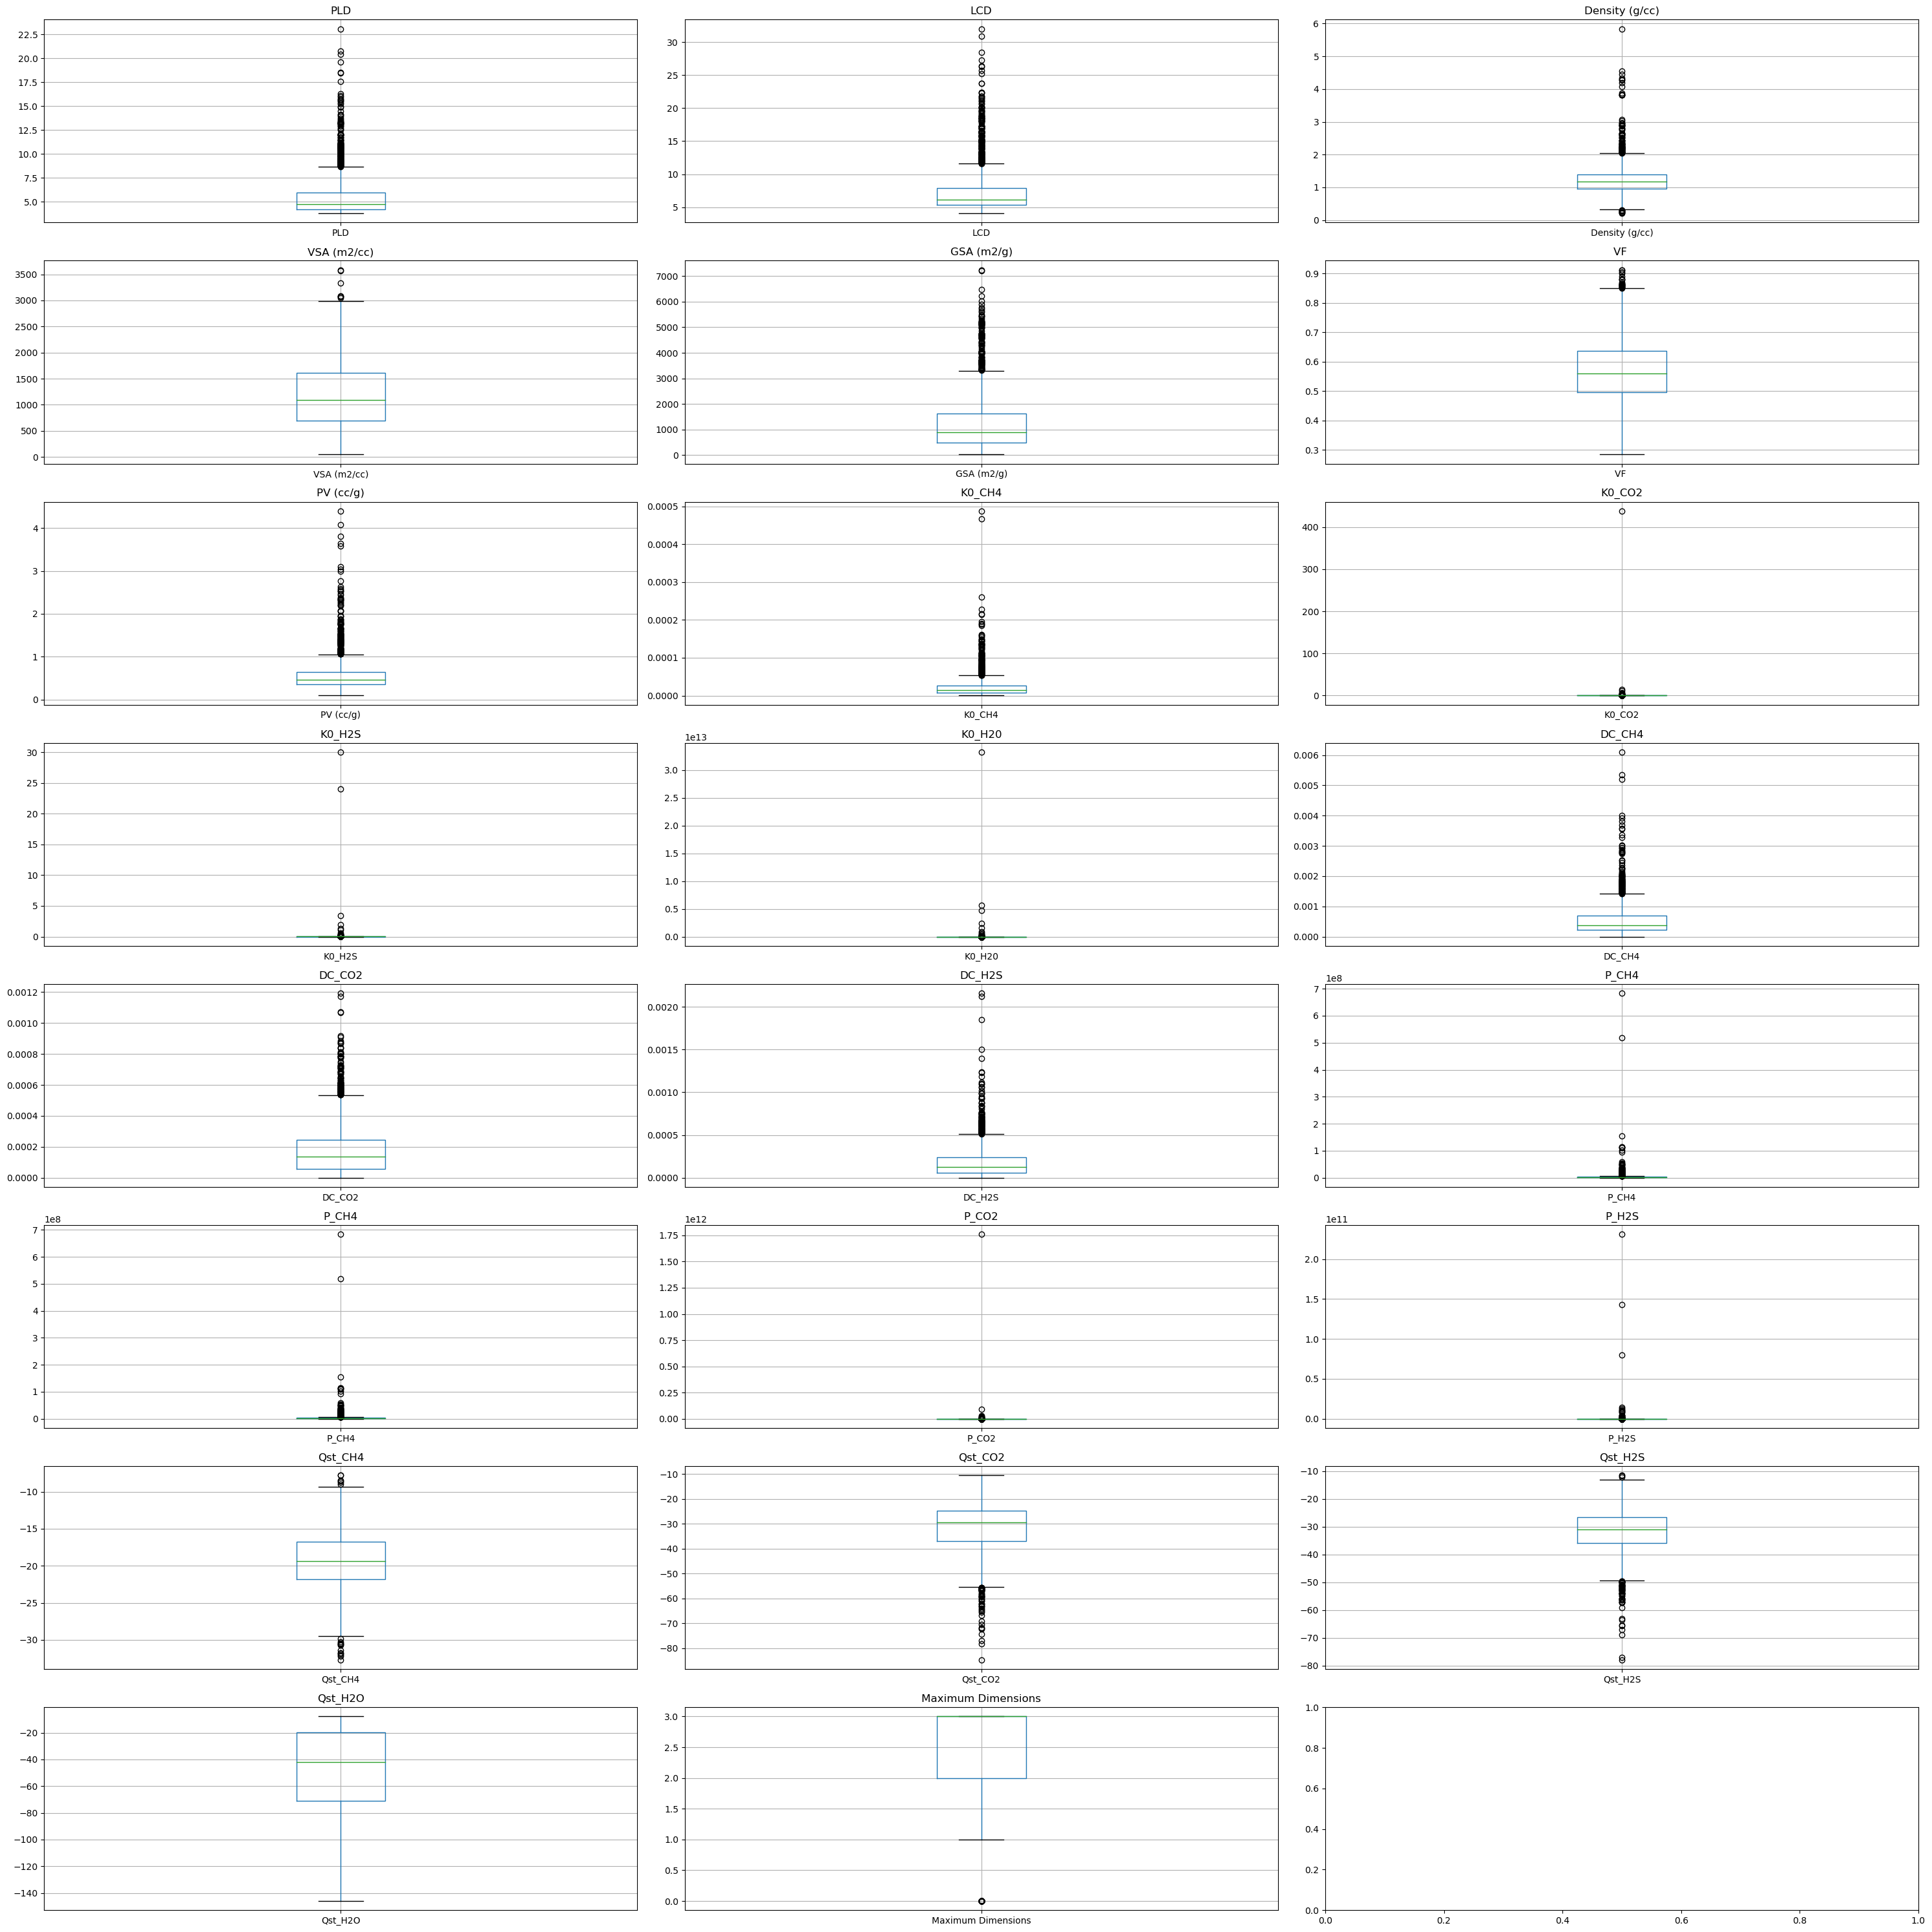

In [10]:
#visualisation
#df_new.columns
#df_new.boxplot(column = ["PLD", "LCD", "Density (g/cc)", "VSA (m2/cc)", "GSA (m2/g)", "PV (cc/g)", "K0_CH4","K0_CO2","K0_H2S","K0_H20","DC_CH4","DC_CO2","DC_H2S","P_CH4","P_CH4","P_CO2","P_H2S","Qst_CH4","Qst_CO2","Qst_H2S","Qst_H2O","Maximum Dimensions"])

#Boxplots for descriptors from the original data

columns = ["PLD", "LCD", "Density (g/cc)", "VSA (m2/cc)", "GSA (m2/g)", "VF ", "PV (cc/g)", "K0_CH4","K0_CO2","K0_H2S","K0_H20","DC_CH4","DC_CO2","DC_H2S","P_CH4","P_CH4","P_CO2","P_H2S","Qst_CH4","Qst_CO2","Qst_H2S","Qst_H2O","Maximum Dimensions"] 

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(30, 30))

axes = axes.flatten()

for i, column in enumerate(columns):
    df_new.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
#df_new.boxplot(column='PLD')
#df_new.boxplot(column='LCD')
#df_new.boxplot(column='Density (g/cc)')

array([[<Axes: title={'center': 'PLD'}>, <Axes: title={'center': 'LCD'}>,
        <Axes: title={'center': 'Density (g/cc)'}>,
        <Axes: title={'center': 'VSA (m2/cc)'}>,
        <Axes: title={'center': 'GSA (m2/g)'}>],
       [<Axes: title={'center': 'VF '}>,
        <Axes: title={'center': 'PV (cc/g)'}>,
        <Axes: title={'center': 'K0_CH4'}>,
        <Axes: title={'center': 'K0_CO2'}>,
        <Axes: title={'center': 'K0_H2S'}>],
       [<Axes: title={'center': 'K0_H20'}>,
        <Axes: title={'center': 'DC_CH4'}>,
        <Axes: title={'center': 'DC_CO2'}>,
        <Axes: title={'center': 'DC_H2S'}>,
        <Axes: title={'center': 'P_CH4'}>],
       [<Axes: title={'center': 'P_CH4'}>,
        <Axes: title={'center': 'P_CO2'}>,
        <Axes: title={'center': 'P_H2S'}>,
        <Axes: title={'center': 'Qst_CH4'}>,
        <Axes: title={'center': 'Qst_CO2'}>],
       [<Axes: title={'center': 'Qst_H2S'}>,
        <Axes: title={'center': 'Qst_H2O'}>,
        <Axes: title={'ce

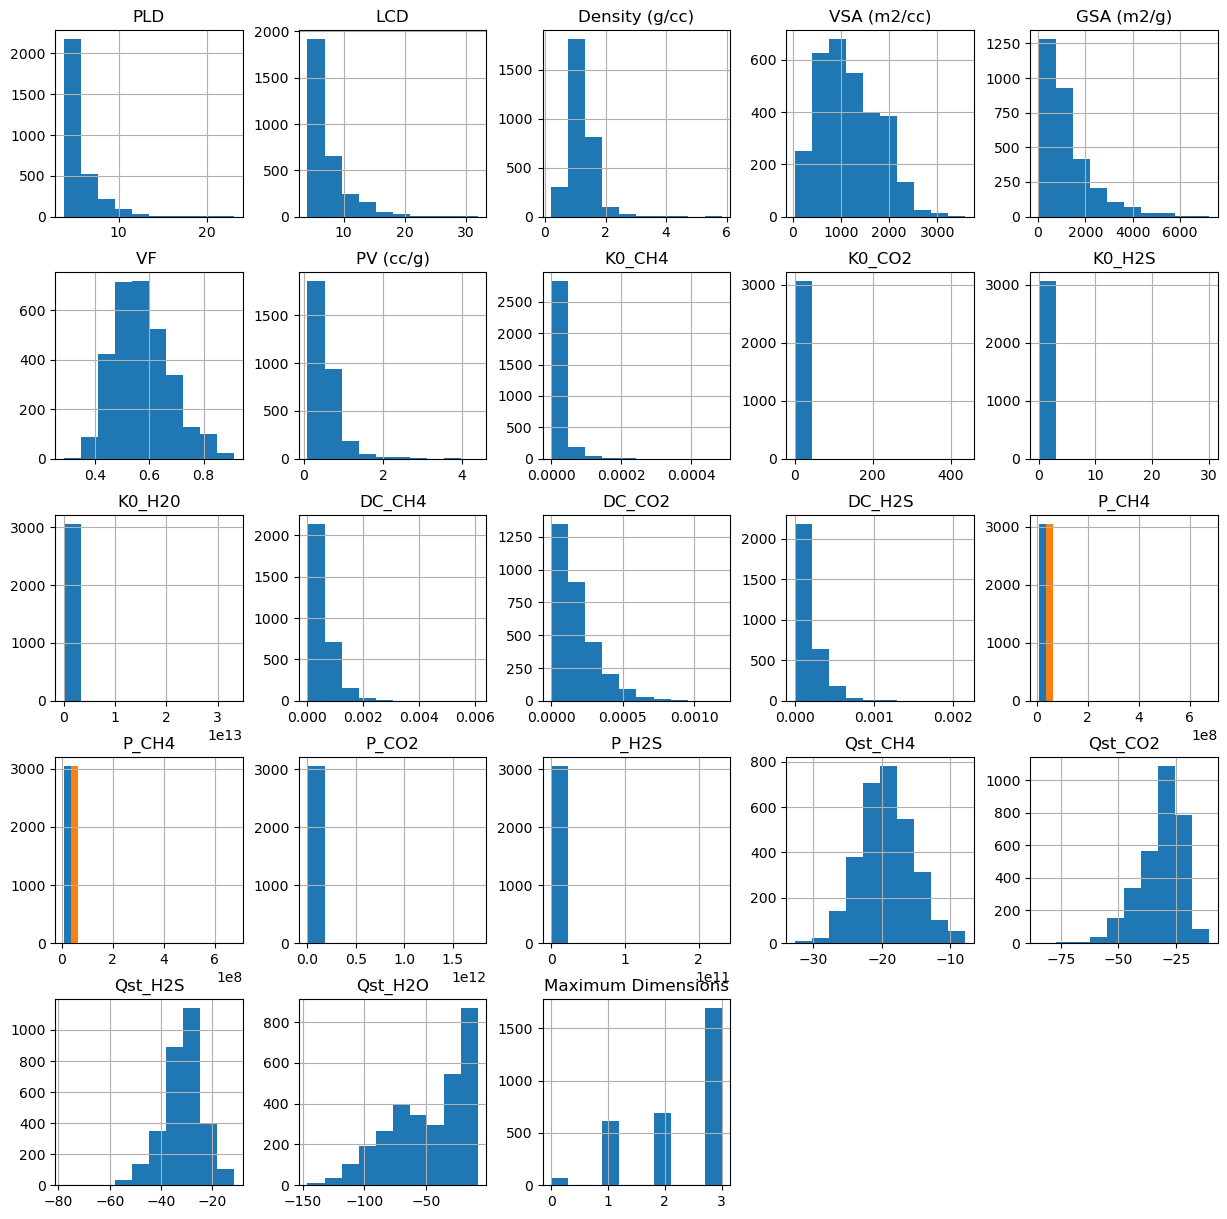

In [11]:
#Before normalisation

df_new.hist(column = ["PLD", "LCD", "Density (g/cc)", "VSA (m2/cc)", "GSA (m2/g)","VF ", "PV (cc/g)", "K0_CH4","K0_CO2","K0_H2S","K0_H20","DC_CH4","DC_CO2","DC_H2S","P_CH4","P_CH4","P_CO2","P_H2S","Qst_CH4","Qst_CO2","Qst_H2S","Qst_H2O","Maximum Dimensions"], figsize=(15,15))


In [12]:
#Density plots

IndexError: index 23 is out of bounds for axis 0 with size 5

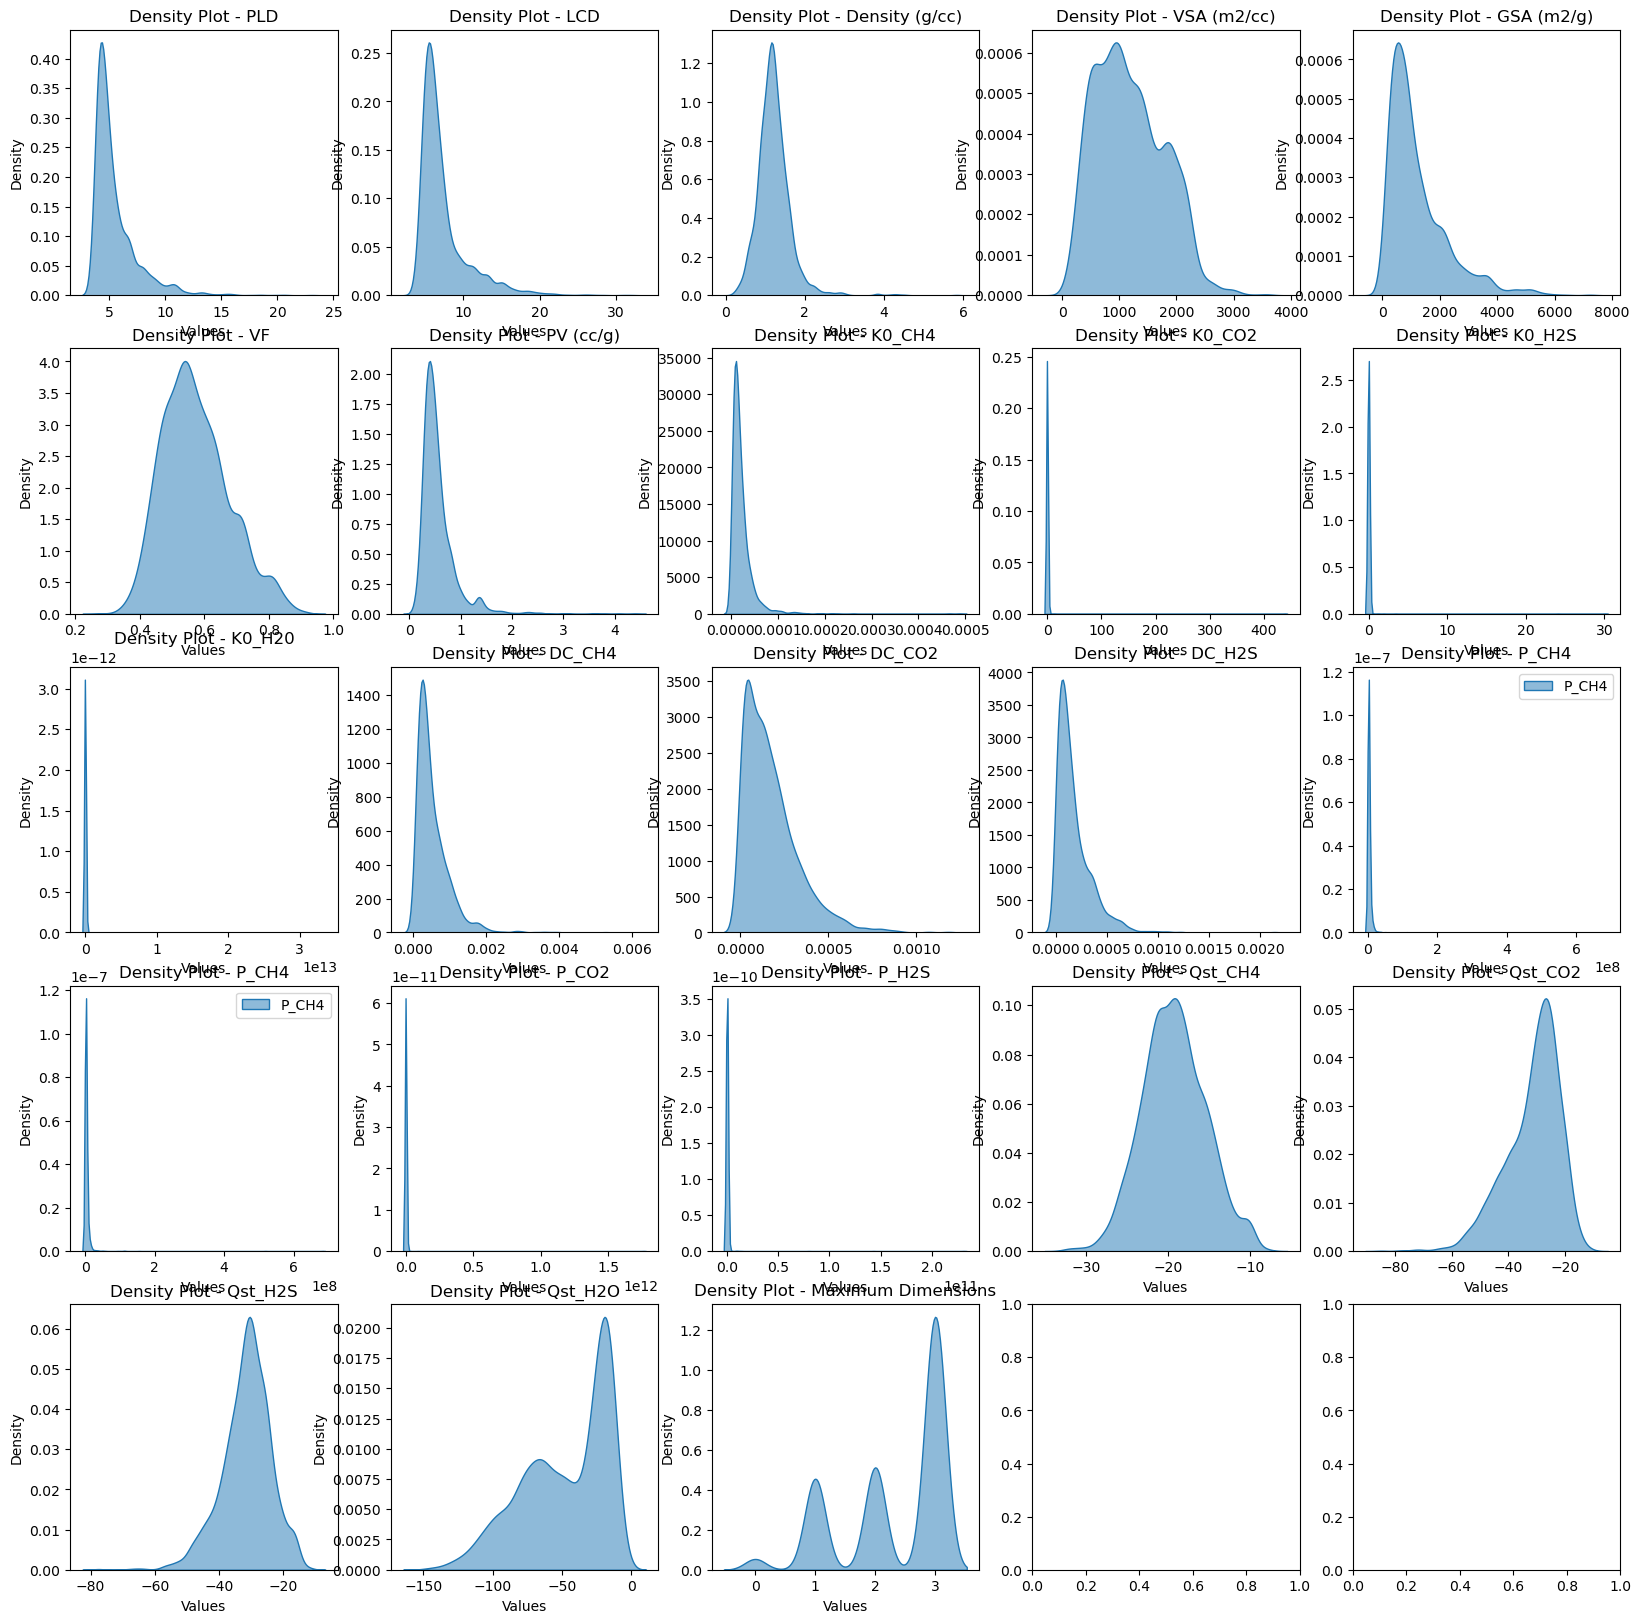

In [13]:
sub_df = df_new[columns]

'''
sns.set(style="whitegrid")
sns.kdeplot(data=sub_df, fill=True, alpha=0.5)
plt.legend(title="Columns")
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Density Plots")
plt.show()
'''

num_col = len(sub_df.columns)

num_rows = (num_col - 1) // 5 + 1
num_cols = min(num_col, 5)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for i, column in enumerate(sub_df.columns):
    # Create density plot for the current column
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]

    # Create density plot for the current column
    sns.kdeplot(data=sub_df[column], fill=True, alpha=0.5, ax=ax)
    ax.set_xlabel("Values")
    ax.set_ylabel("Density")
    ax.set_title(f"Density Plot - {column}")

    
if num_col < num_rows * num_cols:
    for j in range(num_col, num_rows * num_cols):
        fig.delaxes(axes[j])
        
fig.tight_layout()    
plt.show()

In [15]:
#robust scaler method 

#robust_sc = RobustScaler() 
#robust_sc.fit(df_new) #calculate median and IQR 
#r_scaled_df = robust_sc.transform(df_new) 

columns_sc = ["PLD", "LCD", "Density (g/cc)", "VSA (m2/cc)", "GSA (m2/g)", "VF ", "PV (cc/g)", "K0_CH4","K0_CO2","K0_H2S","K0_H20","DC_CH4","DC_CO2","DC_H2S","P_CH4","P_CH4","P_CO2","P_H2S","Qst_CH4","Qst_CO2","Qst_H2S","Qst_H2O","Maximum Dimensions"]

"""
r_scale = df_new[columns_sc]
robust_sc = RobustScaler() 


#robust_sc.fit(df_new) #calculate median and IQR and then dont use the outliers during these calculations
r_scaled_df = robust_sc.fit_transform(r_scale) 

df_new[columns_sc] = r_scaled_df
"""

#std_scaler = StandardScaler() 
#std_scaled_df = std_scaler.fit_transform(data_df) 

#scaled_vals = pd.DataFrame({ 
    #"Standard": std_scaled_df.reshape(-1), 
    #"Robust": robust_sc_df.reshape(-1) 
#}) 


"""
m_scale = df_new[columns_sc] 
minmax_sc = MinMaxScaler() 

#robust_sc.fit(df_new) #calculate median and IQR and then dont use the outliers during these calculations
m_scaled_df = minmax_sc.fit_transform(m_scale)  

df_new[columns_sc] = m_scaled_df 
"""

#POWER TRANSFORMER INIT
r_scale = df_new[columns_sc]
scaler = PowerTransformer()
r_scaled_df = scaler.fit_transform(r_scale) 
df_new[columns_sc] = r_scaled_df

In [16]:
df_new.describe()

,PLD,LCD,Density (g/cc),VSA (m2/cc),GSA (m2/g),VF,PV (cc/g),K0_CH4,K0_CO2,K0_H2S,...,CO2 loading (mol/kg),CH4 loading (mol/kg),CO2 error (mol/kg),CH4 error (mol/kg),Selectivity (CO2),Selectivity error,TSN,logS error,TSN error,logS
count,3.063000e+03,3.063000e+03,3.063000e+03,3.063000e+03,3.063000e+03,3.063000e+03,3.063000e+03,3.063000e+03,3.063000e+03,3063.000000,...,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000
mean,3.818326e-15,-5.168427e-15,8.304744e-16,2.041390e-16,5.567426e-16,9.928576e-16,6.495330e-16,1.484647e-16,-3.711617e-17,0.000000,...,5.870671,0.790645,0.099360,0.031538,55.096172,39.973923,6.070971,0.035490,0.213790,1.000579
std,1.000163e+00,1.000163e+00,1.000163e+00,1.000163e+00,1.000163e+00,1.000163e+00,1.000163e+00,1.000163e+00,1.000163e+00,1.000163,...,3.085573,0.688525,0.062906,0.019530,491.481354,624.247694,4.718856,0.050849,0.292122,0.483871
min,-1.559953e+00,-2.369682e+00,-3.964848e+00,-2.885539e+00,-3.533533e+00,-3.835146e+00,-3.432016e+00,-1.928477e+00,-4.134209e-01,-0.596421,...,0.362104,0.000361,0.001808,0.000243,1.335137,0.020657,0.052239,0.002869,0.006544,0.125526
25%,-8.522580e-01,-7.605200e-01,-5.669991e-01,-7.517816e-01,-7.169435e-01,-7.219513e-01,-7.022113e-01,-8.166663e-01,-3.961175e-01,-0.529050,...,3.462921,0.302629,0.056332,0.017624,4.911865,0.186366,2.870111,0.014858,0.095743,0.691246
50%,-1.035095e-01,-9.954658e-02,4.296588e-02,1.159914e-04,-2.225514e-02,-3.465501e-02,-4.879286e-02,-1.260694e-01,-3.681891e-01,-0.411388,...,5.552362,0.576874,0.086359,0.028176,7.316035,0.419612,5.117278,0.024702,0.151583,0.864276
75%,8.023770e-01,6.952649e-01,5.870708e-01,7.885034e-01,7.188599e-01,6.969612e-01,6.661368e-01,7.339506e-01,-2.143449e-01,-0.002458,...,8.080601,1.057207,0.126597,0.041587,16.028083,1.252800,7.843721,0.040164,0.246301,1.204882
max,2.145262e+00,2.196700e+00,5.025711e+00,2.986526e+00,2.722850e+00,2.566280e+00,2.568164e+00,2.260955e+00,4.512762e+00,4.001761,...,25.674543,3.607074,0.559890,0.206305,13206.533549,19946.865838,72.283471,1.548542,6.372467,4.120789


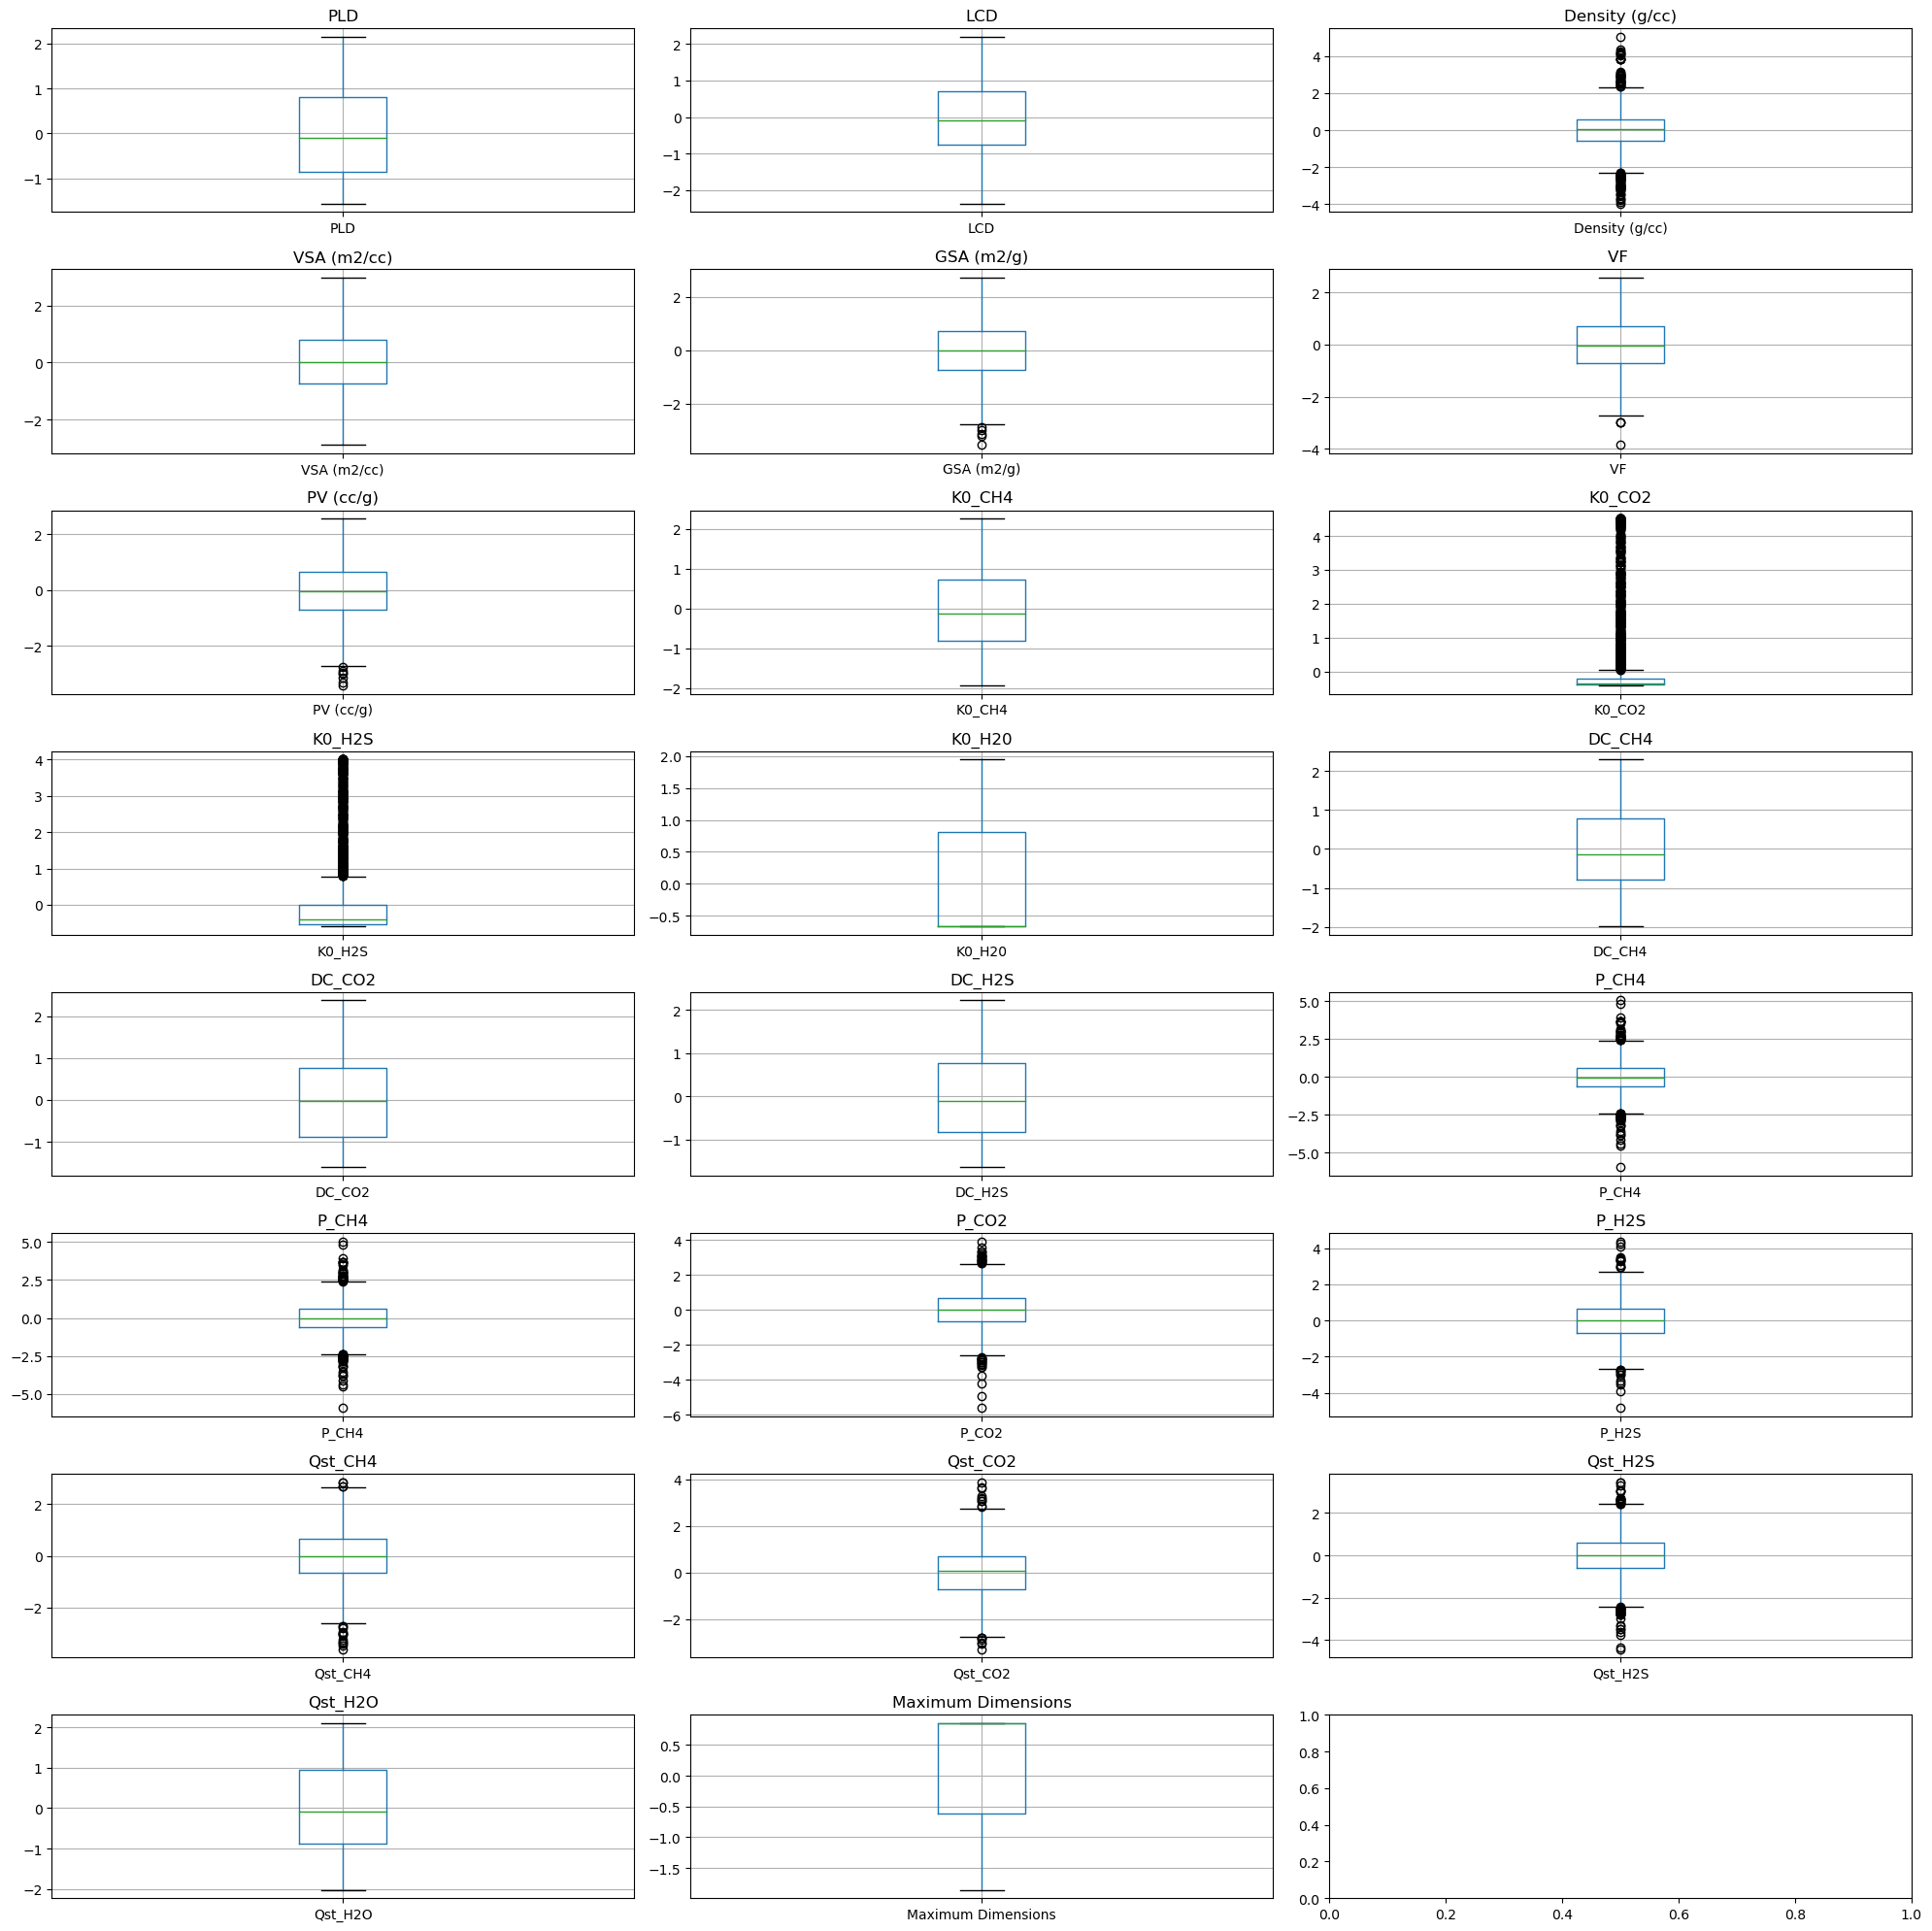

In [17]:
#HIST AFTER Normalisation

columns = ["PLD", "LCD", "Density (g/cc)", "VSA (m2/cc)", "GSA (m2/g)", "VF ", "PV (cc/g)", "K0_CH4","K0_CO2","K0_H2S","K0_H20","DC_CH4","DC_CO2","DC_H2S","P_CH4","P_CH4","P_CO2","P_H2S","Qst_CH4","Qst_CO2","Qst_H2S","Qst_H2O","Maximum Dimensions"]

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 20))

axes = axes.flatten()

for i, column in enumerate(columns):
    df_new.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()

array([[<Axes: title={'center': 'PLD'}>, <Axes: title={'center': 'LCD'}>,
        <Axes: title={'center': 'Density (g/cc)'}>,
        <Axes: title={'center': 'VSA (m2/cc)'}>,
        <Axes: title={'center': 'GSA (m2/g)'}>],
       [<Axes: title={'center': 'VF '}>,
        <Axes: title={'center': 'PV (cc/g)'}>,
        <Axes: title={'center': 'K0_CH4'}>,
        <Axes: title={'center': 'K0_CO2'}>,
        <Axes: title={'center': 'K0_H2S'}>],
       [<Axes: title={'center': 'K0_H20'}>,
        <Axes: title={'center': 'DC_CH4'}>,
        <Axes: title={'center': 'DC_CO2'}>,
        <Axes: title={'center': 'DC_H2S'}>,
        <Axes: title={'center': 'P_CH4'}>],
       [<Axes: title={'center': 'P_CH4'}>,
        <Axes: title={'center': 'P_CO2'}>,
        <Axes: title={'center': 'P_H2S'}>,
        <Axes: title={'center': 'Qst_CH4'}>,
        <Axes: title={'center': 'Qst_CO2'}>],
       [<Axes: title={'center': 'Qst_H2S'}>,
        <Axes: title={'center': 'Qst_H2O'}>,
        <Axes: title={'ce

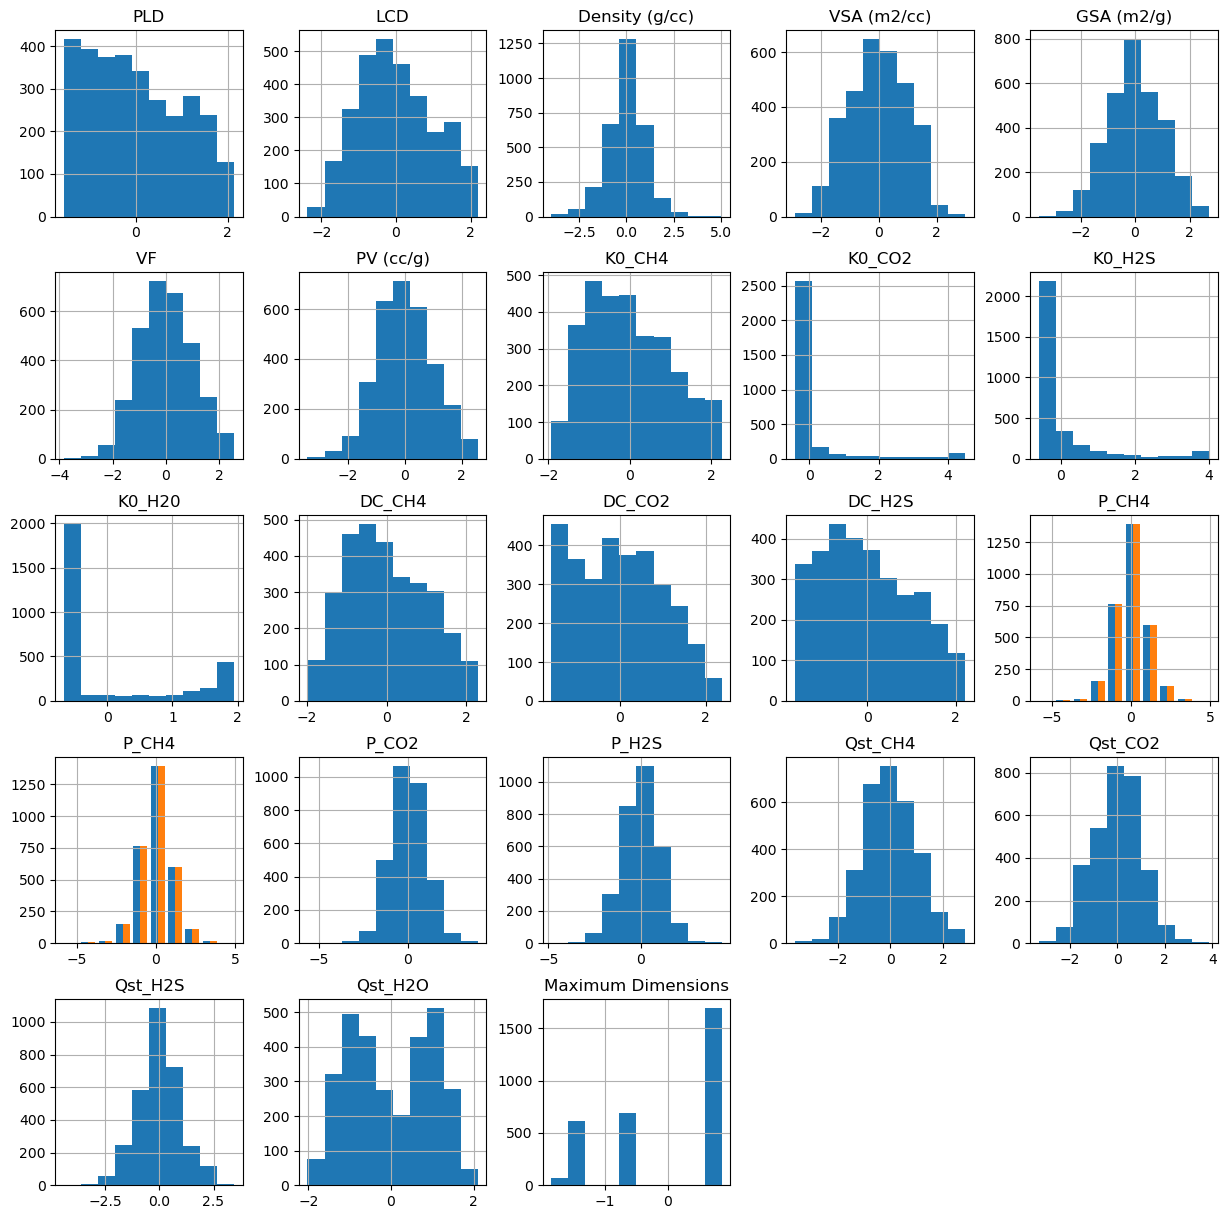

In [18]:
#After normalisation

df_new.hist(column = ["PLD", "LCD", "Density (g/cc)", "VSA (m2/cc)", "GSA (m2/g)", "VF ", "PV (cc/g)", "K0_CH4","K0_CO2","K0_H2S","K0_H20","DC_CH4","DC_CO2","DC_H2S","P_CH4","P_CH4","P_CO2","P_H2S","Qst_CH4","Qst_CO2","Qst_H2S","Qst_H2O","Maximum Dimensions"], figsize=(15,15))


<function matplotlib.pyplot.show(close=None, block=None)>

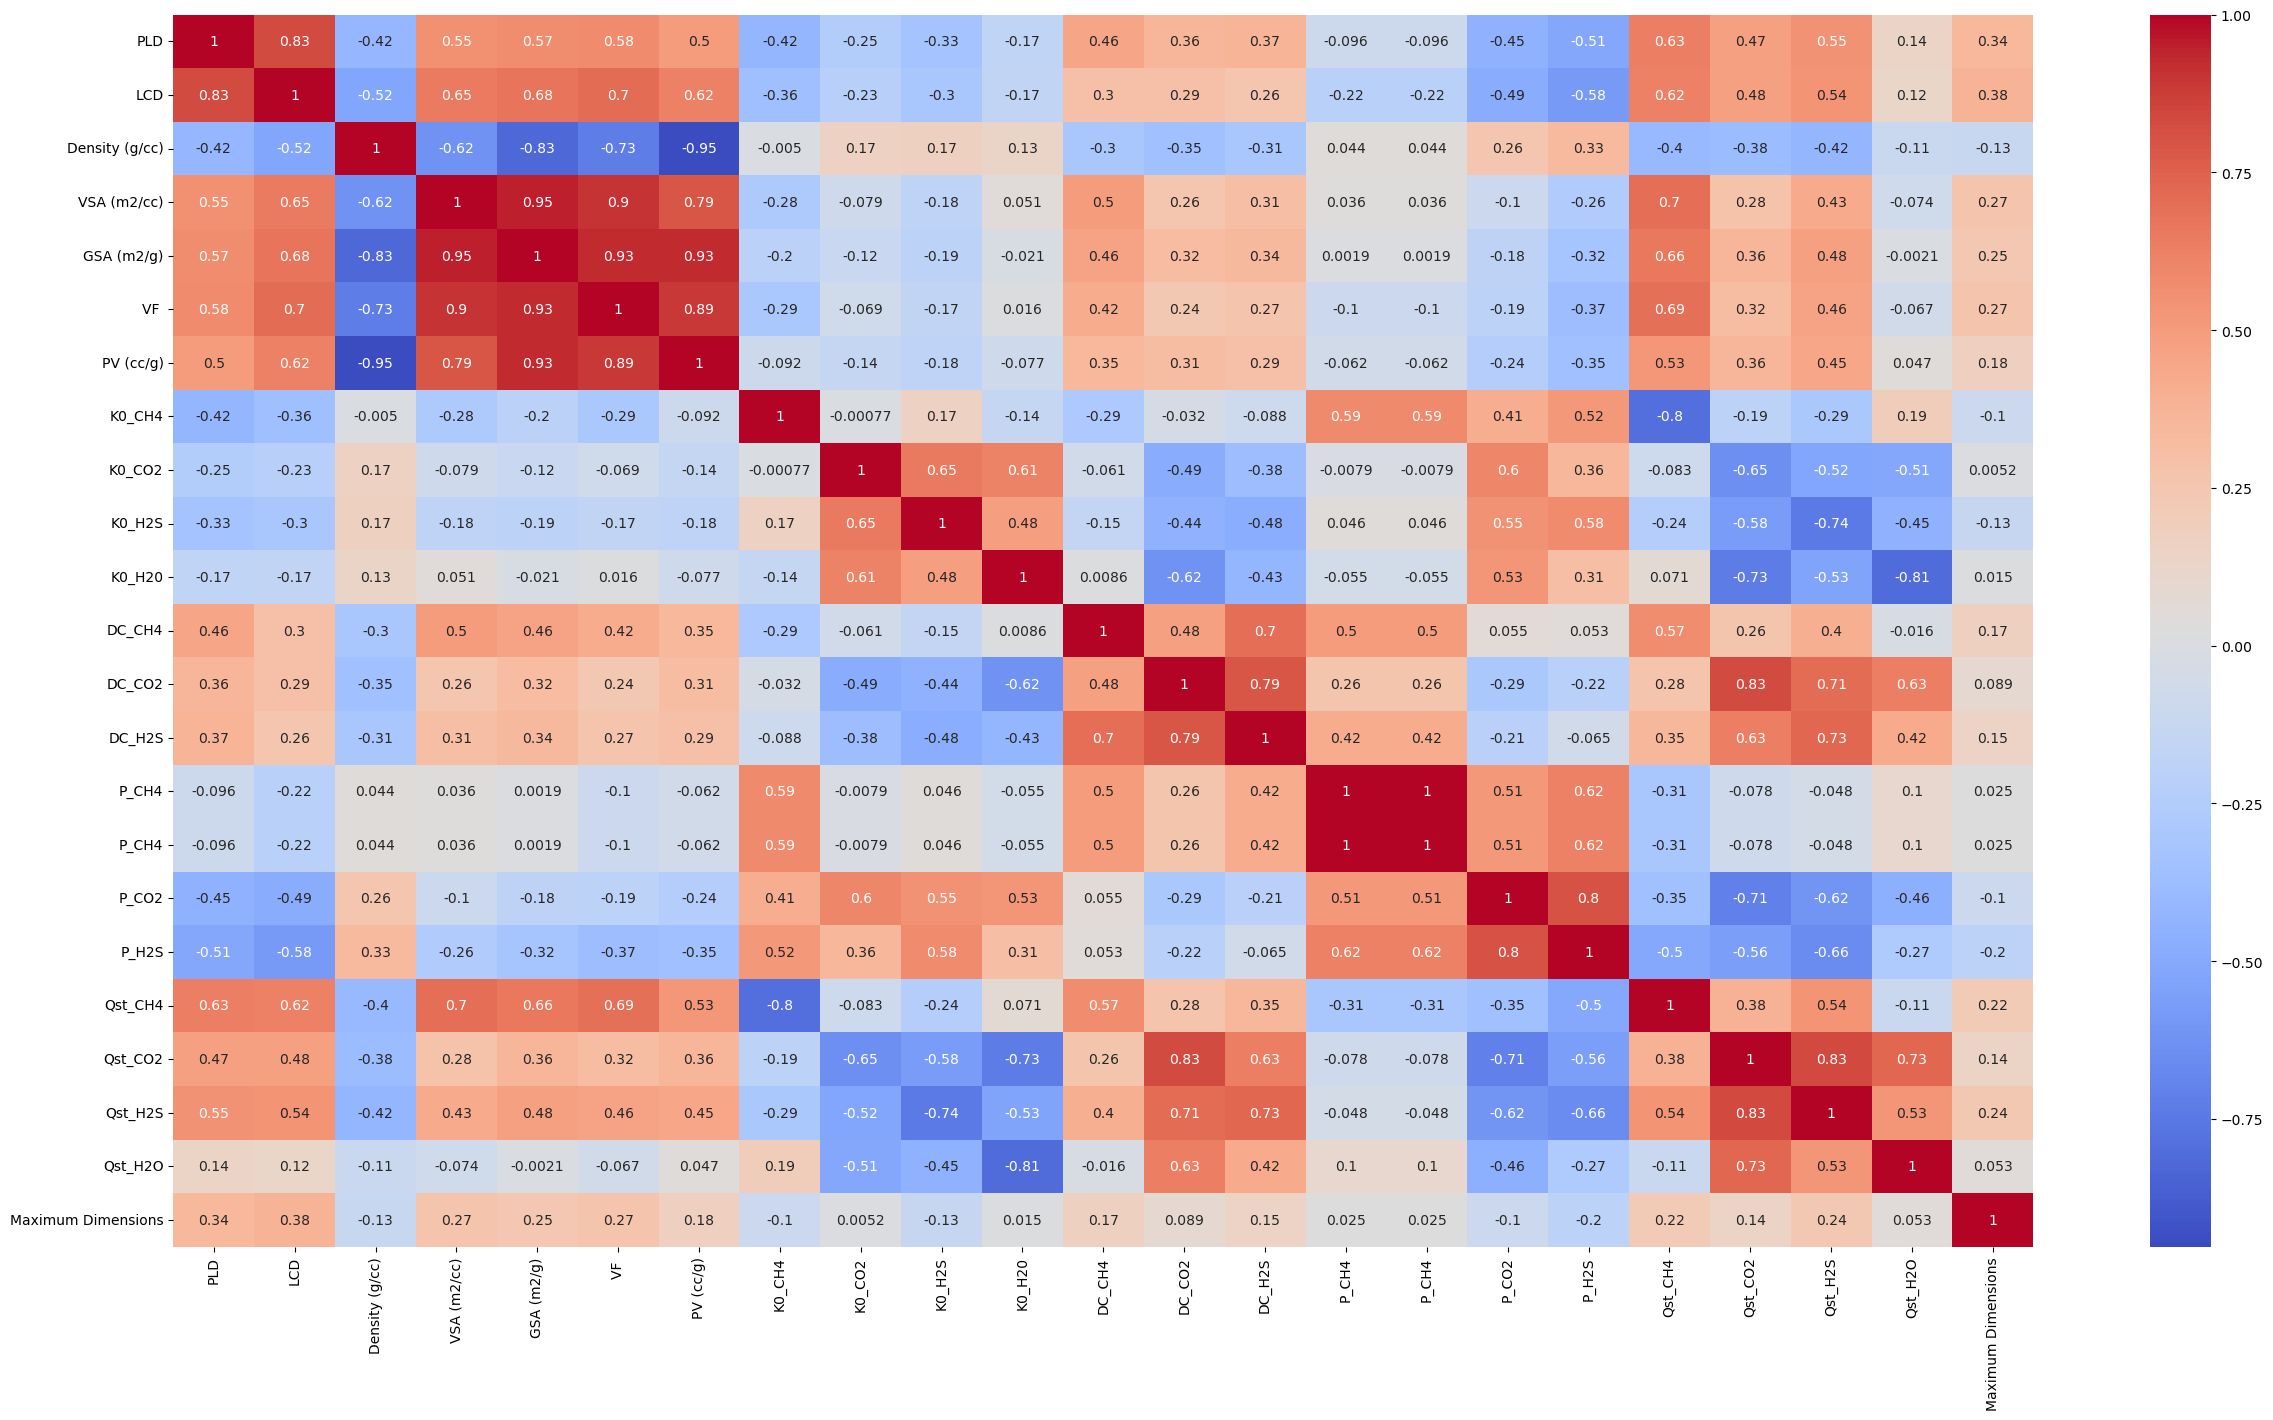

In [19]:
#This is for the original data not the PCA features

columns_heat = ["PLD", "LCD", "Density (g/cc)", "VSA (m2/cc)", "GSA (m2/g)", "VF ", "PV (cc/g)", "K0_CH4","K0_CO2","K0_H2S","K0_H20","DC_CH4","DC_CO2","DC_H2S","P_CH4","P_CH4","P_CO2","P_H2S","Qst_CH4","Qst_CO2","Qst_H2S","Qst_H2O","Maximum Dimensions"]
df_col = df_new[columns_heat] 

corr_matrix = df_col.corr()
plt.figure(figsize=(30, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show


In [20]:
#df_pca.describe()

In [21]:

#X = df_pca

#INDIVIDUAL FEATURE SELECTION (WRAPPER METHODS)

X = df_new[['PLD', 'LCD', 'Density (g/cc)', 'VSA (m2/cc)', 'GSA (m2/g)', "VF ", 'PV (cc/g)', 'K0_CH4','K0_CO2','K0_H2S','K0_H20','DC_CH4','DC_CO2','DC_H2S','P_CH4','P_CH4','P_CO2','P_H2S','Qst_CH4','Qst_CO2','Qst_H2S','Qst_H2O','Maximum Dimensions']]
Y = df_new[['CO2 loading (mol/kg)','CH4 loading (mol/kg)','TSN', 'logS']]

print(X.shape)
print(Y.shape)

#FEATURE IMPORTANCE GRAPH

selected_features = pd.DataFrame()

for target_column in Y.columns:
    model = LinearRegression()
    rfe = RFE(estimator = model, n_features_to_select=23)
    rfe.fit(X,Y[target_column])
    selected_features[target_column] = X.columns[rfe.support_]

print(selected_features)


(3063, 23)
(3063, 4)
   CO2 loading (mol/kg) CH4 loading (mol/kg)                 TSN  \
0                   PLD                  PLD                 PLD   
1                   LCD                  LCD                 LCD   
2        Density (g/cc)       Density (g/cc)      Density (g/cc)   
3           VSA (m2/cc)          VSA (m2/cc)         VSA (m2/cc)   
4            GSA (m2/g)           GSA (m2/g)          GSA (m2/g)   
5                   VF                   VF                  VF    
6             PV (cc/g)            PV (cc/g)           PV (cc/g)   
7                K0_CH4               K0_CH4              K0_CH4   
8                K0_CO2               K0_CO2              K0_CO2   
9                K0_H2S               K0_H2S              K0_H2S   
10               K0_H20               K0_H20              K0_H20   
11               DC_CH4               DC_CH4              DC_CH4   
12               DC_CO2               DC_CO2              DC_CO2   
13               DC_H2S    

In [22]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an empty dictionary to store the regression models for each label
regression_models = {}

# Iterate over each target column and perform linear regression
for target_column in Y.columns:
    # Get the selected features for the current target column
    selected_features_col = selected_features[target_column]

    # Subset the training and testing data with the selected features
    X_train_selected = X_train[selected_features_col]
    X_test_selected = X_test[selected_features_col]

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data with selected features
    model.fit(X_train_selected, y_train[target_column])

    # Make predictions on the test data with selected features
    y_pred = model.predict(X_test_selected)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test[target_column], y_pred)

    # Calculate the R2 score
    r2 = r2_score(y_test[target_column], y_pred)

    # Calculate the mean absolute error
    mae = mean_absolute_error(y_test[target_column], y_pred)
    
    # Store the regression model for the current label
    regression_models[target_column] = model

    # Print the evaluation metrics for the current label
    print(f"Evaluation metrics for {target_column}:")
    print(f"MSE: {mse}")
    print(f"R2 score: {r2}")
    print(f"MAE: {mae}")
    print("-----------------------------------")

# Access the regression model for a specific label
#specific_model = regression_models['specific_label']
    

Evaluation metrics for CO2 loading (mol/kg):
MSE: 1.4024834924332947
R2 score: 0.8516887039710673
MAE: 0.8113620911468468
-----------------------------------
Evaluation metrics for CH4 loading (mol/kg):
MSE: 0.06780225438023466
R2 score: 0.8564935173385924
MAE: 0.19968254583201378
-----------------------------------
Evaluation metrics for TSN:
MSE: 8.320806787317059
R2 score: 0.6483939600309259
MAE: 1.6050918357238435
-----------------------------------
Evaluation metrics for logS:
MSE: 0.07635426612420623
R2 score: 0.7030800402166082
MAE: 0.1749020309292867
-----------------------------------


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


for target_column in Y.columns:
    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train, y_train[target_column])

    # Make predictions on the training data
    y_train_pred = model.predict(X_train)

    # Make predictions on the test data
    y_test_pred = model.predict(X_test)

    # Calculate the training metrics
    train_mse = mean_squared_error(y_train[target_column], y_train_pred)
    train_r2 = r2_score(y_train[target_column], y_train_pred)
    train_mae = mean_absolute_error(y_train[target_column], y_train_pred)

    # Calculate the testing metrics
    test_mse = mean_squared_error(y_test[target_column], y_test_pred)
    test_r2 = r2_score(y_test[target_column], y_test_pred)
    test_mae = mean_absolute_error(y_test[target_column], y_test_pred)

    # Print the evaluation metrics for the current label
    print(f"Evaluation metrics for {target_column}:")
    print(f"Training MSE: {train_mse}")
    print(f"Training R2 score: {train_r2}")
    print(f"Training MAE: {train_mae}")
    print(f"Testing MSE: {test_mse}")
    print(f"Testing R2 score: {test_r2}")
    print(f"Testing MAE: {test_mae}")
    print("-----------------------------------")

Evaluation metrics for CO2 loading (mol/kg):
Training MSE: 1.30759889876719
Training R2 score: 0.8621831204432664
Training MAE: 0.8102122803824733
Testing MSE: 1.3473258299718145
Testing R2 score: 0.8597049603078598
Testing MAE: 0.8027192472065364
-----------------------------------
Evaluation metrics for CH4 loading (mol/kg):
Training MSE: 0.07280676890203053
Training R2 score: 0.8451622608405608
Training MAE: 0.2039833669548905
Testing MSE: 0.06594460026208052
Testing R2 score: 0.864023197448494
Testing MAE: 0.19789068802525908
-----------------------------------
Evaluation metrics for TSN:
Training MSE: 6.556404534409118
Training R2 score: 0.7038972724839614
Training MAE: 1.5367848051198854
Testing MSE: 7.393941481260572
Testing R2 score: 0.6730298936223453
Testing MAE: 1.573588955543729
-----------------------------------
Evaluation metrics for logS:
Training MSE: 0.06465319648317494
Training R2 score: 0.7177789289307104
Training MAE: 0.16427299587851973
Testing MSE: 0.071655324685